<a href="https://colab.research.google.com/github/kiniv-21/Car-Price-Prediction/blob/main/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing reuired libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
#import os
#os.chdir(r'/content/car data.csv')


NotADirectoryError: ignored

In [4]:
car_data = pd.read_csv('car data.csv')
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
car_data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [9]:
print( car_data['Fuel_Type'].value_counts())

print(car_data['Seller_Type'].value_counts())
print(car_data['Transmission'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [10]:
fuel_type = car_data['Fuel_Type']
seller_type = car_data['Seller_Type']
transmission_type = car_data['Transmission']
selling_price = car_data['Selling_Price']

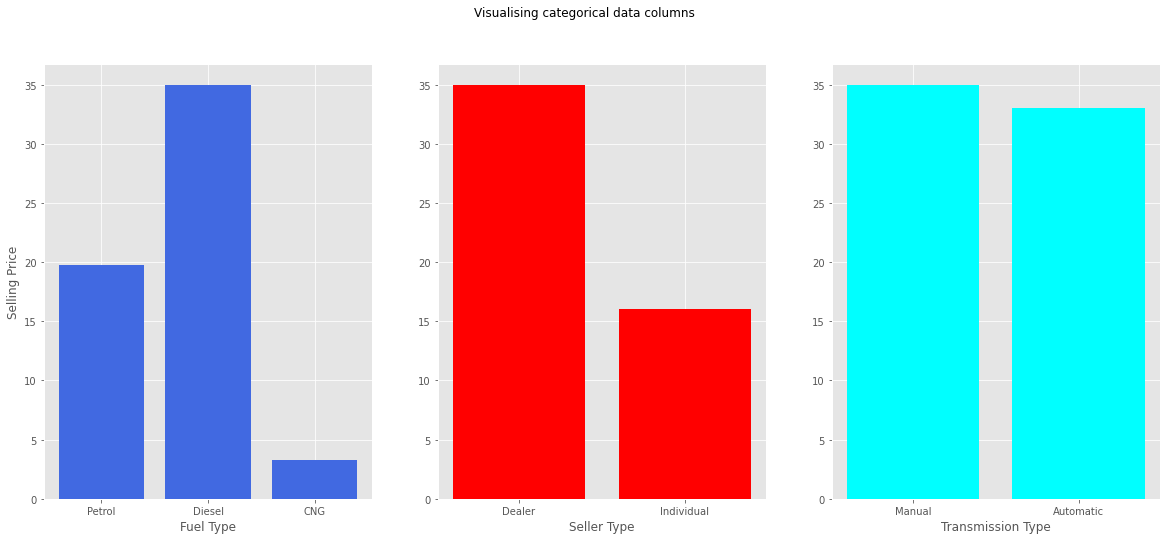

In [11]:
from matplotlib import style
style.use('ggplot')
fig = plt.figure(figsize=(20,8))
fig.suptitle('Visualising categorical data columns')
plt.subplot(1,3,1)
plt.bar(fuel_type,selling_price, color = 'royalblue')
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price")
plt.subplot(1,3,2)
plt.bar(seller_type,selling_price, color = 'red')
plt.xlabel("Seller Type")
plt.subplot(1,3,3)
plt.bar(transmission_type,selling_price, color = 'cyan')
plt.xlabel("Transmission Type")
plt.show()

# Seaborn Plot

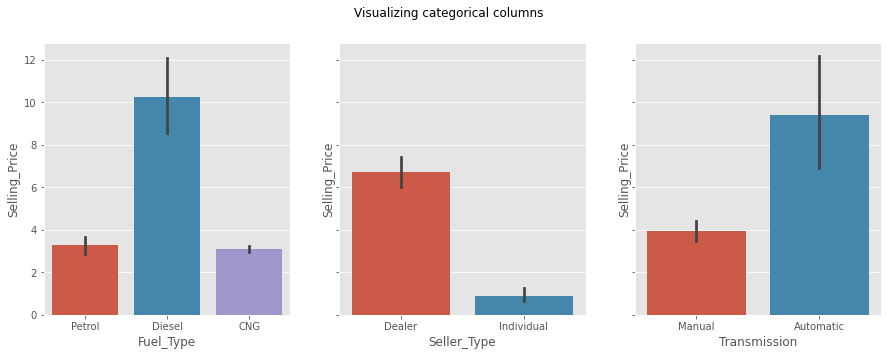

In [12]:
fig, axes = plt.subplots (1,3, figsize=(15,5), sharey=True)
fig.suptitle('Visualizing categorical columns')
sns.barplot(x=fuel_type, y=selling_price, ax=axes[0])
sns.barplot (x=seller_type, y=selling_price, ax=axes[1])
sns.barplot (x=transmission_type, y=selling_price, ax=axes[2])

In [13]:
petrol_data = car_data.groupby('Fuel_Type').get_group('Petrol')
petrol_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,239.000000,239.000000,239.000000,239.000000,239.000000
mean,2013.539749,3.264184,5.583556,33528.937238,0.050209
std,3.042674,3.135537,5.290685,40308.984886,0.270368
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.600000,0.940000,13850.000000,0.000000
50%,2014.000000,2.650000,4.600000,25870.000000,0.000000
75%,2016.000000,5.200000,7.980000,44271.000000,0.000000
max,2017.000000,19.750000,23.730000,500000.000000,3.000000


In [14]:
seller_data = car_data.groupby('Seller_Type').get_group('Dealer')
seller_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,195.000000,195.000000,195.000000,195.000000,195.000000
mean,2013.712821,6.721692,10.886308,39850.133333,0.020513
std,2.686275,5.136088,8.806563,24860.401003,0.142111
min,2003.000000,1.050000,2.690000,2071.000000,0.000000
25%,2012.000000,3.750000,6.580000,22148.500000,0.000000
50%,2014.000000,5.250000,8.500000,39485.000000,0.000000
75%,2016.000000,7.625000,13.460000,51785.500000,0.000000
max,2018.000000,35.000000,92.600000,197176.000000,1.000000


# manual one hot encoding for fuel type, 

In [15]:
#manual encoding
car_data.replace({ 'Fuel_Type': {'Petrol': 0, 'Diesel':1, 'CNG':2}}, inplace=True)
#one hot encoding
car_data = pd.get_dummies (car_data, columns=['Seller_Type', 'Transmission'], drop_first=True)
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,0,1
1,sx4,2013,4.75,9.54,43000,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,0,1
4,swift,2014,4.60,6.87,42450,1,0,0,1


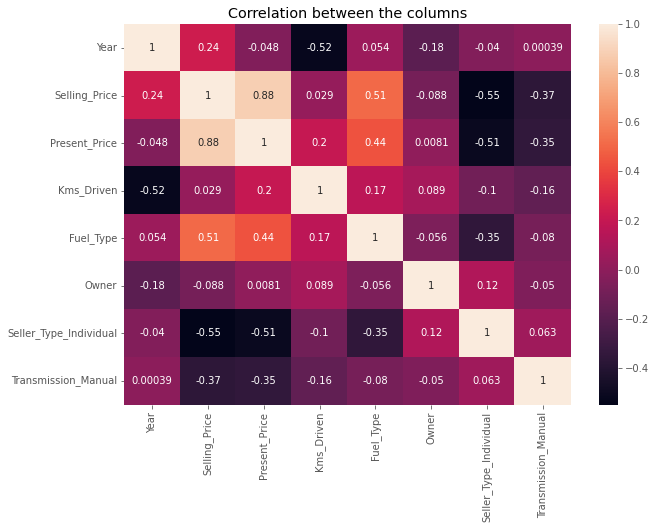

In [16]:
plt.figure(figsize=(10,7))
sns.heatmap(car_data.corr(), annot = True)
plt.title('Correlation between the columns')
plt.show()

Usually least correlated columns are removed but in this case due to less columns in the dataset we can't drop columns. Hence we draw a regression plot between present price and selling price to understand the corelation better.

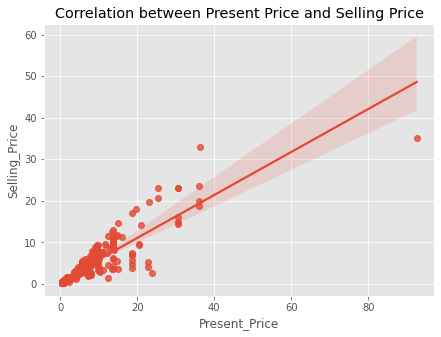

In [17]:
fir = plt.figure(figsize=(7,5))
plt.title('Correlation between Present Price and Selling Price')
sns.regplot(x = 'Present_Price', y = 'Selling_Price', data = car_data)

Next step is performing training and testing split but before that we need to split it into x and y. Seling_Price is our target column, and objective of this whole project is to predict this price for various models which will be our Y data and X data will have car data with car name and respective selling prices removed from the car data. 

In [18]:
X = car_data.drop(['Car_Name','Selling_Price'], axis = 1)
y = car_data['Selling_Price']
print("Shape of X is: ",X.shape)
print("Shape of y is: ",y.shape)

Shape of X is:  (301, 7)
Shape of y is:  (301,)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
print("Shape of X_test is: ",X_test.shape)
print("Shape of X_train is: ",X_train.shape)
print("Shape of y_test is: ",y_test.shape)
print("Shape of y_train is: ",y_train.shape)

Shape of X_test is:  (91, 7)
Shape of X_train is:  (210, 7)
Shape of y_test is:  (91,)
Shape of y_train is:  (210,)


Next step is to normalize data in different columns of the dataset, and I am using standard scaler to normalises the data as it standardizes features by removing the mean and scaling to unit variance.

In [20]:
scaler = StandardScaler()

In [21]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#fitting the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [22]:
pred = model.predict(X_test)

To see how well our model fits the data, I am calculating mean squared error, mean absolute error, r2 score

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [24]:
print("Mean Absolute Error:", (metrics.mean_absolute_error(pred, y_test)))
print("Mean Squared Error:", (metrics.mean_squared_error(pred, y_test)))
print("R2 Score:", (metrics.r2_score(pred, y_test)))

Mean Absolute Error: 1.2319533008766876
Mean Squared Error: 3.45795384583379
R2 Score: 0.8528582949898238


Text(0.5, 1.0, 'Predicted Price versus Actual Price')

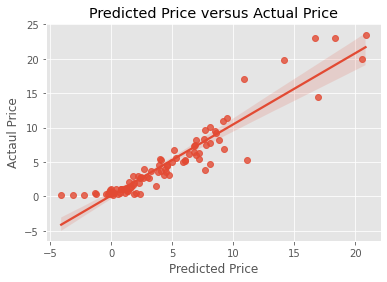

In [25]:
sns.regplot(x = pred, y = y_test)
plt.xlabel("Predicted Price")
plt.ylabel("Actaul Price")
plt.title("Predicted Price versus Actual Price")